### Initialize the environment

In [44]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [46]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [47]:
run=1
date_time='2017-02-20_2317' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [48]:
config

{u'dbns': {u'GE': {u'batchSize': 1,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [2, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 0.01],
   u'layersNodes': [400, 40],
   u'lr': [0.005, 0.02],
   u'persistent': True},
  u'ME': {u'batchSize': 1,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [2],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': True},
  u'SM': {u'batchSize': 1,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [2, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.01],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.04],
   u'persistent': True}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.01, 0.01],
  u'persistent': True},
 u'uuid': u'7f6f469

### Load the dataset and visualize the input of the pathways

In [49]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [50]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

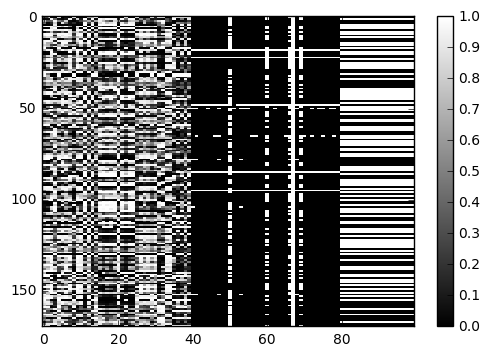

In [51]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [52]:
joint_layer[1:10,1:10]

array([[  3.13007161e-02,   9.52304065e-01,   4.02885646e-01,
          5.04332036e-02,   2.39719227e-02,   8.87247324e-02,
          9.47836459e-01,   7.98766911e-02,   8.25201511e-01],
       [  3.56816888e-01,   3.77630889e-01,   9.75984514e-01,
          4.73153532e-01,   3.49284410e-01,   8.27125430e-01,
          4.11365405e-02,   1.00459456e-02,   7.89156631e-02],
       [  2.45973244e-02,   1.53634995e-01,   7.98597276e-01,
          3.15805674e-02,   9.12754118e-01,   4.19055849e-01,
          5.52917682e-02,   1.81811258e-01,   2.76911706e-02],
       [  1.21428224e-03,   6.19975403e-02,   9.31023896e-01,
          2.52482295e-03,   1.69522371e-02,   1.18370745e-02,
          4.36981954e-02,   2.63494067e-02,   1.22489575e-02],
       [  9.87652719e-01,   9.81585979e-01,   7.74599016e-01,
          9.42876518e-01,   7.65940130e-01,   9.89666700e-01,
          5.62766969e-01,   1.83196012e-02,   9.53545332e-01],
       [  9.80931363e-05,   9.07684207e-01,   9.99056518e-01,
   

### Check the weights distributions

([array([  2.00000000e+00,   1.31000000e+02,   1.42300000e+03,
           4.34400000e+03,   5.85900000e+03,   4.87400000e+03,
           2.39600000e+03,   7.87000000e+02,   1.14000000e+02,
           7.00000000e+00]),
  array([   22.,   400.,  1459.,  2734.,  4272.,  4646.,  3912.,  2000.,
           461.,    31.]),
  array([  2.00000000e+00,   1.23000000e+02,   1.38400000e+03,
           4.38700000e+03,   5.91300000e+03,   4.87100000e+03,
           2.35700000e+03,   7.70000000e+02,   1.25000000e+02,
           5.00000000e+00]),
  array([   18.,   362.,  1392.,  2751.,  4348.,  4871.,  3934.,  1888.,
           356.,    17.]),
  array([   18.,   350.,  1384.,  2762.,  4328.,  4842.,  3953.,  1921.,
           364.,    15.]),
  array([   24.,   368.,  1435.,  2754.,  4330.,  4711.,  3893.,  1988.,
           409.,    25.]),
  array([  2.00000000e+00,   1.23000000e+02,   1.37600000e+03,
           4.42900000e+03,   5.89200000e+03,   4.84700000e+03,
           2.36500000e+03,   7.8300000

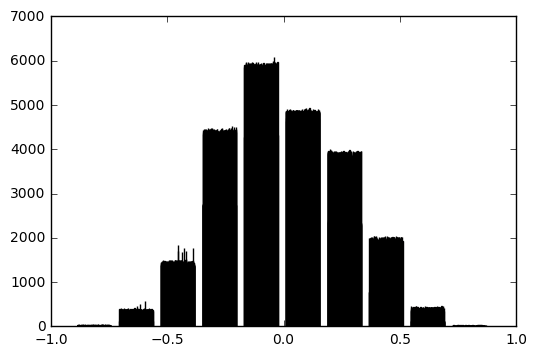

In [53]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x1455b98d0>,
 <a list of 3 Text xticklabel objects>)

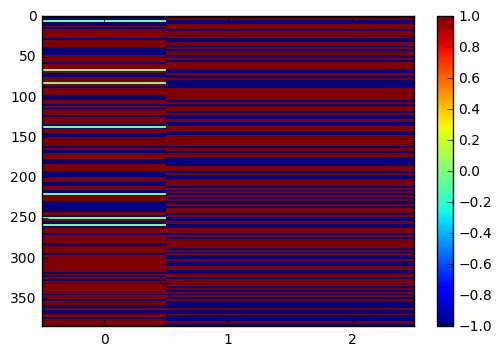

In [54]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x1452494d0>,
 <a list of 3 Text xticklabel objects>)

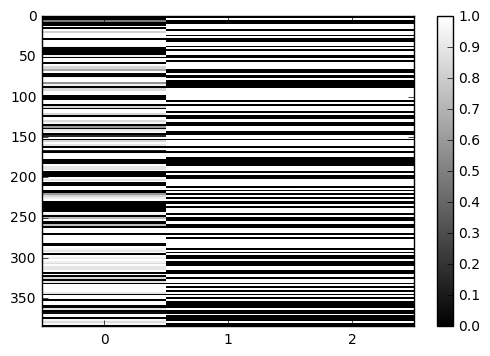

In [55]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 63.,   2.,   0.,   0.,   1.,   2.,   2.,   2.,  24.,  74.]),
  array([ 80.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  90.]),
  array([ 80.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  90.])],
 array([  5.89495686e-23,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 3 Lists of Patches objects>)

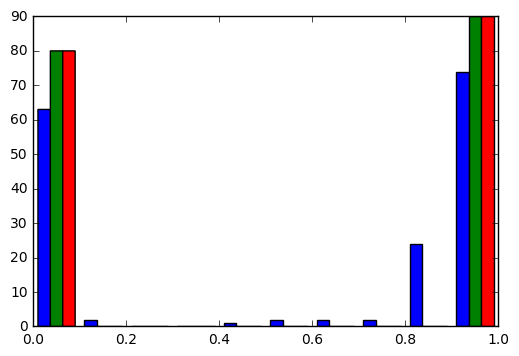

In [56]:
plt.hist(top_output)

In [57]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [58]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 35.,  31.,  45.,  59.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5]),
 <a list of 4 Patch objects>)

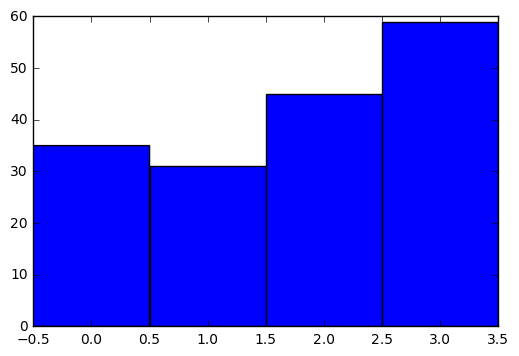

In [59]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [60]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [61]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [62]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


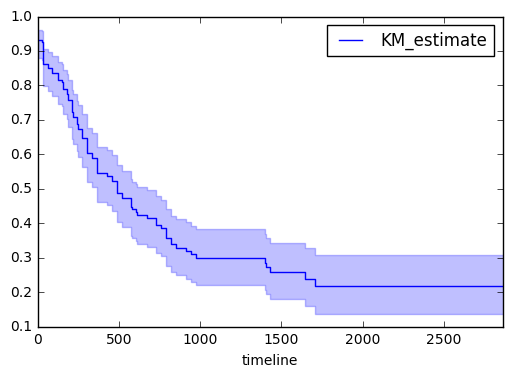

In [63]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

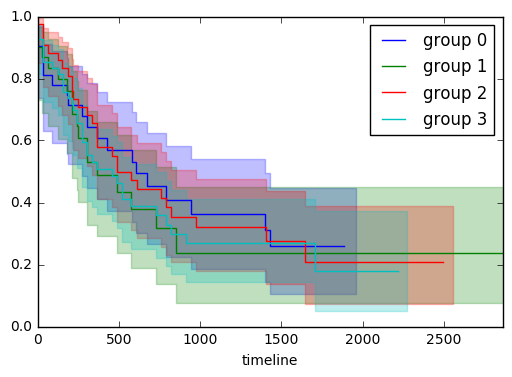

In [64]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [1,2,3]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)